## Adding a black rectangle to a video file

This notebook is here help add a black rectangle over a video file.

WHat it does is first extract a frame from the video so that the user may see where they want to place the rectangle.

Once we have coordinates for the rectangle this merely crafts a ffmpeg commands and runs it.


In [1]:
## dependencies to install if that is not already the case:
## imageio
# !pip install imageio[ffmpeg]

import imageio
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import os


In [2]:
## input video file:
filename = 'toy_data/part7_clip1.mp4'
## frame to extract:
frame_to_extract = 0.5  # by default, extract the frame at the middle-point of the video

## output video file:
output_file = "out.mp4"


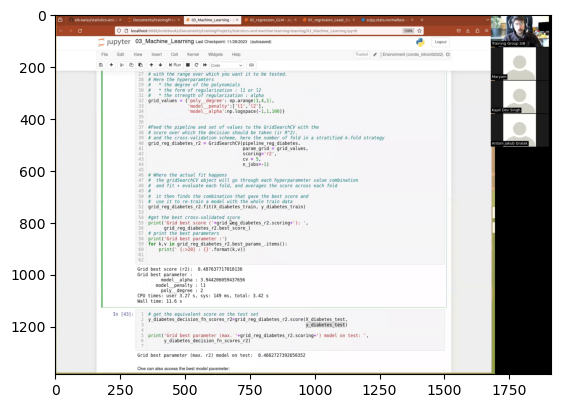

In [3]:

vid = imageio.get_reader(filename,  'ffmpeg')

image = vid.get_data( int( 25*(vid.get_meta_data()['duration'] * frame_to_extract ) ) ) 
fig = plt.figure()
plt.imshow(image)

Do not hesitate to change `frame_to_extract` to get a frame where you see the elements to hide

Next up, we need to setup where the rectangle will be: adapt the left, bottom, width and height to match the area you want to hide.

NB: for extra visibility we plot the rectangle in red here, but in subsequent command we will put it in black.

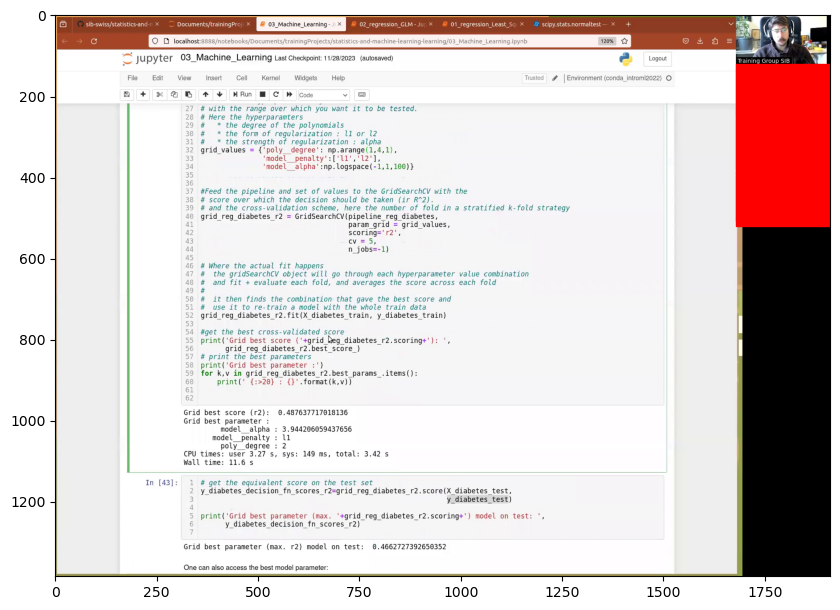

In [7]:

left=1680
bottom=120
width=250
height=400


fig, ax = plt.subplots( figsize = (10,10))
ax.imshow(image)

p = plt.Rectangle((left, bottom), width, height, fill=True , color = 'red')
ax.add_patch(p)


Once you have the frame place correctly, all that remain is to specify in which file you would like to write the results and to run the ffmpeg command:

In [8]:
%%time
c = f'ffmpeg -y -i {filename} -vf "drawbox=x={left}:y={bottom}:w={width}:h={height}:color=black:t=fill" {output_file}'
os.system(c)

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

CPU times: user 60.5 ms, sys: 23.8 ms, total: 84.3 ms
Wall time: 35.6 s


frame= 2550 fps= 72 q=-1.0 Lsize=    7031kB time=00:01:42.01 bitrate= 564.6kbits/s speed=2.88x    
video:6075kB audio:877kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 1.128093%
[libx264 @ 0x55b84e84d380] frame I:11    Avg QP:13.29  size:165974
[libx264 @ 0x55b84e84d380] frame P:656   Avg QP:20.68  size:  5355
[libx264 @ 0x55b84e84d380] frame B:1883  Avg QP:30.41  size:   468
[libx264 @ 0x55b84e84d380] consecutive B-frames:  1.1%  0.9%  1.1% 96.9%
[libx264 @ 0x55b84e84d380] mb I  I16..4: 55.5% 23.0% 21.5%
[libx264 @ 0x55b84e84d380] mb P  I16..4:  1.0%  1.2%  0.4%  P16..4:  1.9%  0.2%  0.2%  0.0%  0.0%    skip:95.1%
[libx264 @ 0x55b84e84d380] mb B  I16..4:  0.0%  0.0%  0.0%  B16..8:  1.2%  0.0%  0.0%  direct: 0.3%  skip:98.3%  L0:43.7% L1:54.4% BI: 2.0%
[libx264 @ 0x55b84e84d380] 8x8 transform intra:38.1% inter:26.3%
[libx264 @ 0x55b84e84d380] coded y,uvDC,uvAC intra: 14.1% 15.2% 9.4% inter: 0.2% 0.4% 0.1%
[libx264 @ 0x55b84e84d380] i16 v,h,dc,p: 74% 26%  0%  0%
[

0

To check everything worked, we can show the same frame as before, but from the resulting video:

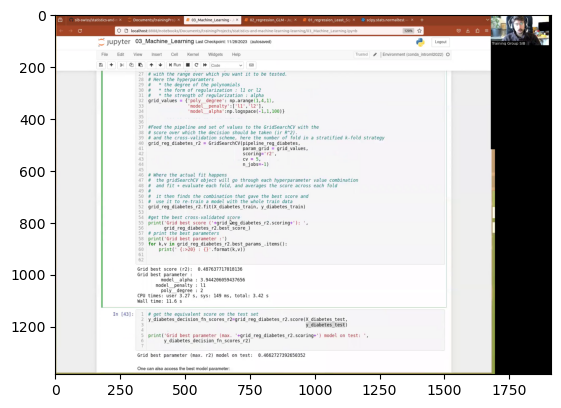

In [9]:
vid = imageio.get_reader(output_file,  'ffmpeg')
image = vid.get_data( int( 25*(vid.get_meta_data()['duration'] * frame_to_extract ) ) ) 
fig = plt.figure()
plt.imshow(image)